# Polynomial Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
%matplotlib inline

In [2]:
df = pd.read_csv("../week_6/data/FuelConsumption.csv")

In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [4]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


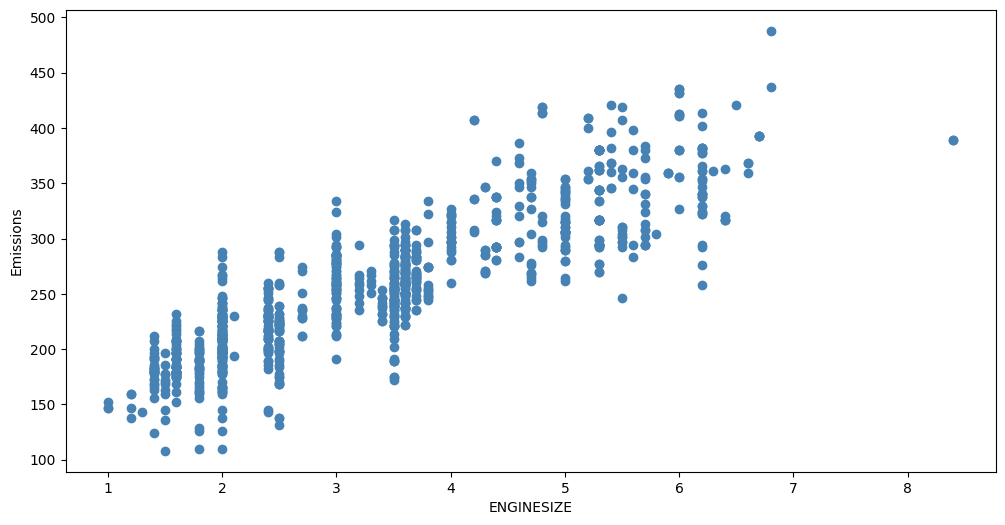

In [6]:
# non-linear regression yapılabilir Bir eğiklik olduğu için
# Başka yöntemlerle yine regression da yapıllabilir ki geçen sefer lineer regression yapmıştık
plt.rcParams['figure.figsize']=(12,6)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [7]:
X_train, X_test, y_train, y_test=train_test_split(cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']],cdf['CO2EMISSIONS'], test_size=0.2)

- In polynomial regression, the  relationship between the independent variable x and the dependent variable y is modeled a nth degree polynomial in x.
-  2nd degree:
    - y = B0 + B1*X + B2*X^2

For example, the original feature set has only one feature: ENGINESIZE
If we select the degree of the polynomial to be 2:
It generates 3 features: degree=0, degree=1, degree=2

In [8]:
X_train = np.asanyarray(X_train[['ENGINESIZE']])
y_train = np.asanyarray(y_train)
X_test = np.asanyarray(X_test[['ENGINESIZE']])
y_test = np.asanyarray(y_test)

In [9]:
poly = PolynomialFeatures(degree=2)

In [11]:
X_train_poly = poly.fit_transform(X_train)

In [13]:
X_train[0:5]

array([[3.3],
       [5.3],
       [3. ],
       [3. ],
       [2. ]])

In [14]:
X_train_poly[0:5]

array([[ 1.  ,  3.3 , 10.89],
       [ 1.  ,  5.3 , 28.09],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  2.  ,  4.  ]])

- Transformed data looks like feature sets of multiple lineaar regression analysis
2nd degree equation would turn into
 - y = b0 + b1 *x1 + b2 * x2

- Polynomial regression is a special case of linear regression, with selection your features. 

- After transforming the equation from non-linear to linear we can calculate non linear regression with linear regression
- Formülü buna dönüştürdükten sonra lineer regresyon kullanarak non-linear regresyonu hesaplayabiliriz.

In [15]:
from sklearn import linear_model
model = linear_model.LinearRegression()


In [16]:
model = model.fit(X_train_poly,y_train)

In [18]:
# The coefficients
print("Coefficents:", model.coef_)
print("Intercept:", model.intercept_)

Coefficents: [ 0.         50.75335126 -1.48648103]
Intercept: 106.2940460475771


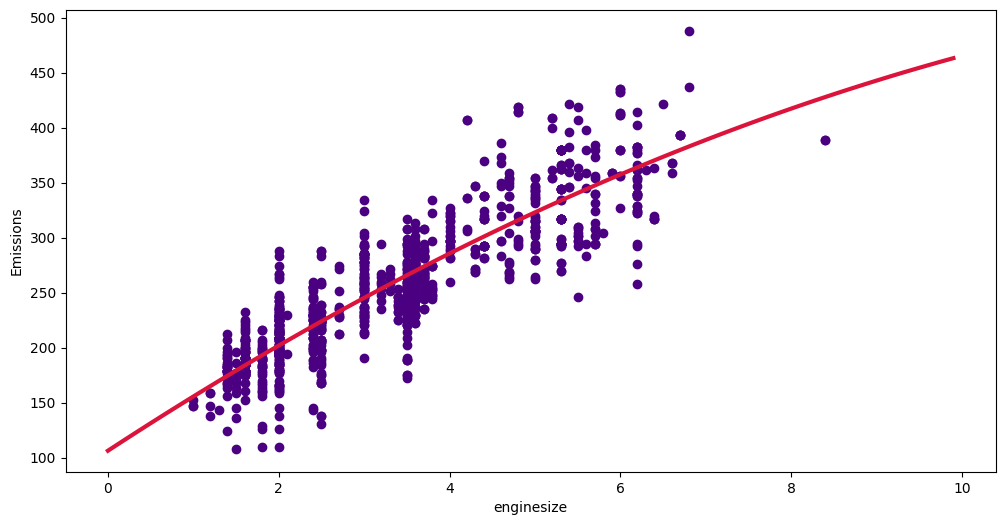

In [22]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color = 'indigo')
# Ne kadar çok veri koyarsak o kadar eğiklik olur. Bunu ayarlayabilirz
# More data point more curve
X = np.arange(0.0, 10.0, 0.1)
# Plottin non-linear regression line
y = model.intercept_ + model.coef_[1]*X + model.coef_[2]*np.power(X,2)
plt.plot(X, y, "crimson", linewidth =3)
plt.xlabel("enginesize")
plt.ylabel("Emissions")
plt.show()

In [24]:
# For every X(data point) we calculate coresponding value by non-linear regression line

# We calculate non-linear regression line by the coefficents 
# that we calculated by training the model with the data about enginesize and carbon emision

# This means for engine size we calculate the carbon emission with the help of non-linear regression
# and we calculate non linear regression with the existing data so we can predict for other values
print(X[0:10])
print(y[0:10])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[106.29404605 111.35451636 116.38525706 121.38626813 126.35754959
 131.29910142 136.21092363 141.09301623 145.9453792  150.76801255]


In [25]:
# To predict we should calculate the data's three features
# Because we trained the model with that data model expects three features
X_test_poly = poly.fit_transform(X_test)# Calculating the feautures
test_pred = model.predict(X_test_poly)


In [26]:
print(f'MAE = %.2f' % np.mean(abs(y_test - test_pred)))
print(f'MSE = %.2f' % np.mean(np.square(y_test - test_pred)))
print(f'RMSE = %.2f' % np.sqrt(np.mean((y_test - test_pred) ** 2)))
print(f"Training score: %.2f" % r2_score(y_test, test_pred))

MAE = 23.05
MSE = 864.34
RMSE = 29.40
Training score: 0.76


Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [27]:
poly_3 = PolynomialFeatures(degree=3)

In [28]:
X_train_poly_3 = poly_3.fit_transform(X_train)

In [29]:
model_3 = linear_model.LinearRegression()

In [30]:
model_3 = model_3.fit(X_train_poly_3,y_train)

In [31]:
# degree=3 , feature= degree+1 =4
model_3.coef_

array([ 0.        , 26.18614313,  5.21813543, -0.55099682])

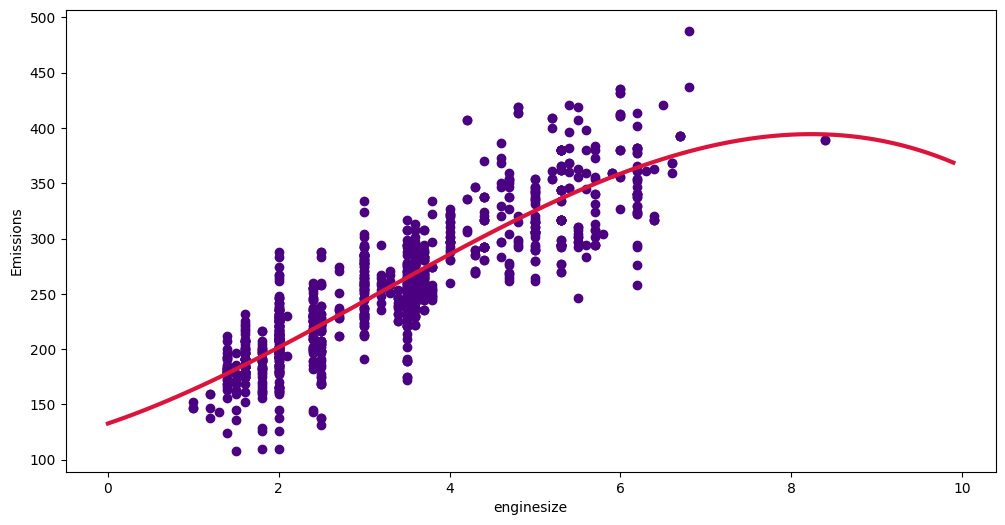

In [35]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color = 'indigo')
X = np.arange(0.0, 10.0, 0.1)
y = model_3.intercept_ + model_3.coef_[1]*X + model_3.coef_[2]*np.power(X,2) + + model_3.coef_[3]*np.power(X,3)
plt.plot(X, y, "crimson", linewidth =3)
plt.xlabel("enginesize")
plt.ylabel("Emissions")
plt.show()

In [33]:
X_test_poly_3 = poly_3.fit_transform(X_test)
test_pred_3 = model_3.predict(X_test_poly_3)


In [34]:
print(f'MAE = %.2f' % np.mean(abs(y_test - test_pred_3)))
print(f'MSE = %.2f' % np.mean(np.square(y_test - test_pred_3)))
print(f'RMSE = %.2f' % np.sqrt(np.mean((y_test - test_pred_3) ** 2)))
print(f"Training score: %.2f" % r2_score(y_test, test_pred_3))

MAE = 23.11
MSE = 867.67
RMSE = 29.46
Training score: 0.76
